In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')

import nltk

In [9]:
df = pd.read_csv('../../Reviews.csv')
df = df.head(500)

In [10]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<Axes: title={'center': 'Count of Reviews by Stars'}, xlabel='Score'>

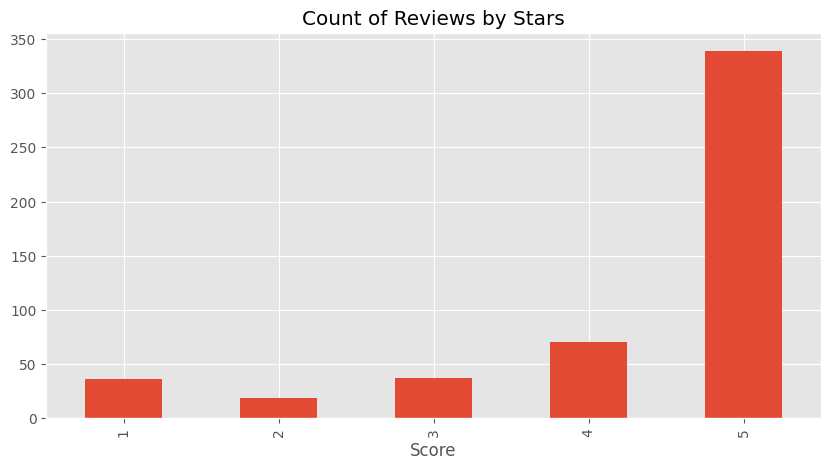

In [11]:
df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(10, 5))

In [20]:
example = df['Text'][50]

example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [26]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', 'Its', 'mushy', 'soft', 'I', 'don']

In [40]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
tagged = nltk.pos_tag(tokens, lang="eng")

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/hasabir/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [43]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

entities =  nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  Its/PRP$
  mushy/JJ
  soft/JJ
  I/PRP
  don/VBP
  t/NNS
  like/IN
  it/PRP
  (PERSON Quaker/NNP Oats/NNP)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB)


[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /home/hasabir/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /home/hasabir/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [45]:
# VADER Seniment Scoring

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/hasabir/nltk_data...


In [49]:
sia.polarity_scores("i am so happy")
sia.polarity_scores("this is the worst thing ever")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [50]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [52]:
res= {}
for i , row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    my_id = row['Id']
    res[my_id] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [62]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


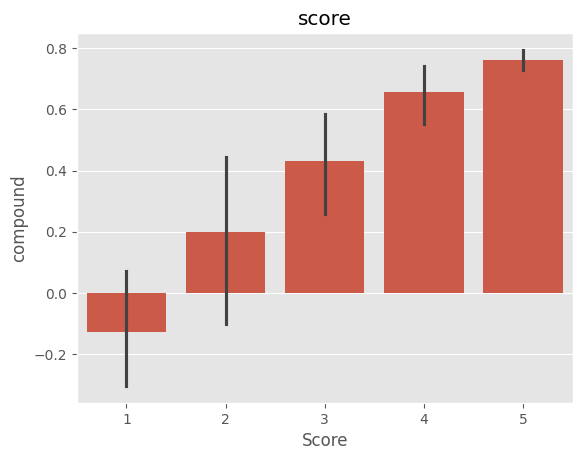

In [64]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('score')
plt.show()

<Axes: xlabel='Score', ylabel='pos'>

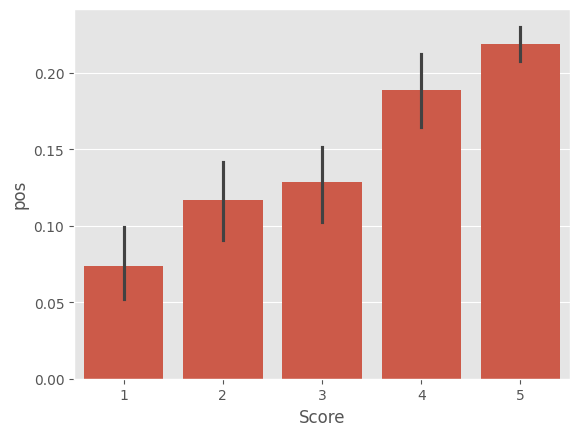

In [67]:
# fig, axs = plt.subplot(1, 3 , figsize=(15, 5))
sns.barplot(data=vaders, x='Score', y='pos')

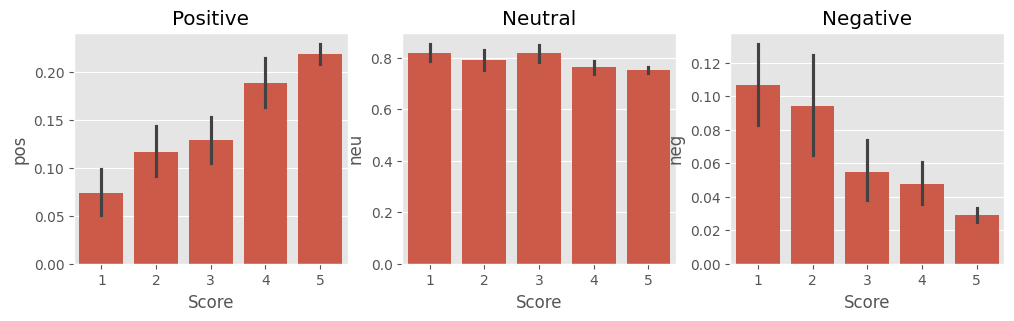

In [71]:
fig, axs = plt.subplots(1, 3,figsize=(12, 3))
sns.barplot(data=vaders, x= 'Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x= 'Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x= 'Score', y='neg', ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')


plt.show()

In [73]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [75]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

ImportError: 
AutoModelForSequenceClassification requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.
